In [2]:
import numpy as np

In [3]:
import csv

In [4]:
N = ord("O") % 3 + 1
N

2

Варіант завдання ^

Створити масив numpy

In [40]:
def get_column_values(filename, column_name):
    with open(filename, 'r') as file:
        csvreader = csv.reader(file)
        headers = next(csvreader)
        column_index = headers.index(column_name)
        values = [int(row[column_index]) for row in csvreader if row[column_index]]
        return np.array(values)[::-1]

In [12]:
filename = "russia_losses_equipment.csv"
column_name = "tank"
tanks = get_column_values(filename, column_name)

In [14]:
tanks[:10]

array([ 80, 146, 150, 150, 198, 211, 217, 251, 269, 285])

Знайти добові втрати танків 

In [15]:
def find_daily_los(arr):
    diff_arr = np.diff(arr)
    diff_arr = np.insert(diff_arr,0,arr[0])
    return diff_arr

In [17]:
dlt = find_daily_los(tanks) #dlt - daily lost tanks
dlt

array([80, 66,  4,  0, 48, 13,  6, 34, 18, 16,  5, 13, 14, 18, 18,  9, 12,
       15, 15, 26, 14,  6, 16, 10, 22, 11,  8, 13, 31, 14,  7,  4, 11,  8,
        9, 11,  6, 13,  3, 29,  8, 14,  2,  5, 17,  3,  7,  7, 14,  3,  6,
       11, 17, 12, 13, 14,  9, 16, 19, 11, 34, 21, 31, 16, 22, 18, 22, 14,
       15, 15, 18, 12,  8, 15, 25, 17,  8, 10, 13,  2,  8,  7, 16,  3,  9,
       15,  7,  8,  9,  3, 10,  7,  8,  8, 11,  9,  3,  2,  4,  9,  5,  5,
        4,  3,  5, 11, 10, 11,  2,  2,  6,  9,  7,  9,  3,  9, 19,  0,  8,
        3,  4, 21, 20, 15,  5,  1,  4,  5,  2,  5,  5,  6,  2, 35,  1,  3,
        4,  4,  0, 18,  5,  5,  7,  3,  4,  9,  4,  0,  4, 14,  8,  7,  1,
        4,  7, 10,  4,  5,  0,  6, 15,  3, 10,  3,  6,  6, 15, 14,  3,  7,
        8, 12,  4,  6,  3, 10,  8,  5,  7,  2,  3,  5,  7,  3,  3,  5,  7,
       20, 23, 12, 25, 15, 19,  9, 20, 15, 10, 14, 18, 15,  6,  5, 13,  6,
        3,  8,  2,  4, 11,  9, 18,  8, 13, 15, 16,  6, 13, 13, 16, 23,  3,
       44, 11, 14, 17,  6

Знайти 4 найбільші добові втрати

In [22]:
def find_four_max(arr):
    listofmax = []
    i = 0
    while i < 4:
        listofmax.append(int(arr.max()))
        arr = np.delete(arr, np.where(arr == arr.max()))
        i += 1
    return listofmax
        

In [23]:
fourmax = find_four_max(dlt)
fourmax

[80, 66, 55, 48]

Визначити скільки танків було втрачено навесні 2024

In [64]:
def find_los_spring(arr):
    ex = arr.copy()
    ex = ex[::-1]
    ex = ex[156:248]
    return int(ex.sum())

In [65]:
lost_in_spring = find_los_spring(dlt)
lost_in_spring

1135

In [57]:
from datetime import datetime, timedelta

In [62]:
def sum_values_in_period(arr, start_date_str, from_date_str, to_date_str):
    start_date = datetime.strptime(start_date_str, "%d.%m.%Y")
    from_date = datetime.strptime(from_date_str, "%d.%m.%Y")
    to_date = datetime.strptime(to_date_str, "%d.%m.%Y")
    
    dates = np.array([start_date + timedelta(days=i) for i in range(arr.shape[0])])
    
    mask = (dates >= from_date) & (dates <= to_date)
    
    return int(np.sum(arr[mask]))

In [63]:
start_date = "25.02.2022"
from_date = "01.03.2024"
to_date = "31.05.2024"

result = sum_values_in_period(dlt, start_date, from_date, to_date)
result

1135

Визначити середнє значення знищених танків за останні 100 днів війни

In [37]:
def arith_mean_last_hundred(arr):
    return float(np.mean(arr[-100:]))

In [38]:
average_last_hundred = arith_mean_last_hundred(dlt)
average_last_hundred

8.62

Графік втрат танків за минулий рік (починаючи з 03.11.2024)

In [41]:
dlt.shape

(983,)

In [46]:
x = np.arange(dlt.shape[0] - 366, dlt.shape[0] + 1)

In [51]:
y = dlt.copy()
y = y[-367:]

In [47]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


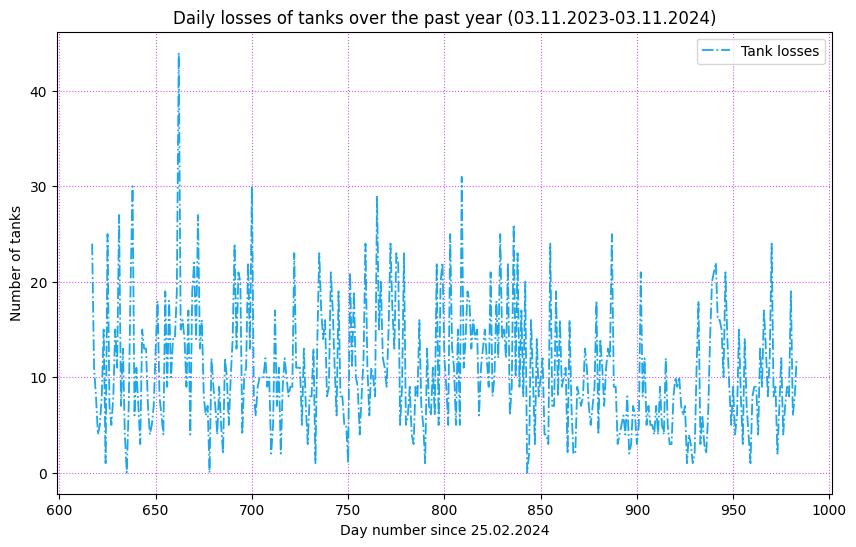

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, linestyle='-.', color='#1ca7e8', linewidth=1.3, label='Tank losses')
plt.grid(True, linestyle=':', color='#be0eeb', alpha=0.7)
plt.title('Daily losses of tanks over the past year (03.11.2023-03.11.2024)')
plt.xlabel('Day number since 25.02.2024')
plt.ylabel('Number of tanks')
plt.legend()
plt.savefig('daily_losses_tanks_last_year.png', dpi=300)